### Part I. API

In this part, we will be using the the covidcast api, and you can find [the documentation here](https://cmu-delphi.github.io/delphi-epidata/).  We will be using the http api and you __should not__ use the `covidcast` python package.  Even though it is available, I want to test you on using the requests package and making http requests directly.

In [17]:
import requests
import pandas as pd
import numpy as np

Read [the documentation about the Epidata API at this README](https://cmu-delphi.github.io/delphi-epidata/api/covidcast.html) and we will be using the covidcast "endpoint".  Pay special attention to the section "Constructing API Queries".  You will be making requests with the request package.  Consider the following get request...
```
https://api.covidcast.cmu.edu/epidata/api.php?endpoint=covidcast&data_source=fb-survey&signal=smoothed_cli&time_type=day&geo_type=county&time_values=20220101-20220106&geo_value=06001
```
If you put this in your browser you see...
```
{ "epidata": [{"geo_value":"06001","signal":"smoothed_cli","time_value":20220101,"direction":null,"issue":20220106,"lag":5,"missing_value":0,"missing_stderr":0,"missing_sample_size":0,"value":1.4538325,"stderr":0.3291942,"sample_size":1052.6756},{"geo_value":"06001","signal":"smoothed_cli","time_value":20220102,"direction":null,"issue":20220107,"lag":5,"missing_value":0,"missing_stderr":0,"missing_sample_size":0,"value":1.8117667,"stderr":0.3580762,"sample_size":1064.7028},{"geo_value":"06001","signal":"smoothed_cli","time_value":20220103,"direction":null,"issue":20220108,"lag":5,"missing_value":0,"missing_stderr":0,"missing_sample_size":0,"value":2.0777178,"stderr":0.3804188,"sample_size":1093.5003},{"geo_value":"06001","signal":"smoothed_cli","time_value":20220104,"direction":null,"issue":20220109,"lag":5,"missing_value":0,"missing_stderr":0,"missing_sample_size":0,"value":2.4268451,"stderr":0.41568,"sample_size":1105.6993},{"geo_value":"06001","signal":"smoothed_cli","time_value":20220105,"direction":null,"issue":20220110,"lag":5,"missing_value":0,"missing_stderr":0,"missing_sample_size":0,"value":2.3800429,"stderr":0.3922188,"sample_size":1136.6034},{"geo_value":"06001","signal":"smoothed_cli","time_value":20220106,"direction":null,"issue":20220111,"lag":5,"missing_value":0,"missing_stderr":0,"missing_sample_size":0,"value":2.625263,"stderr":0.4066375,"sample_size":1132.8466}], "result": 1, "message": "success" }
```
which is the json returned from this query.  The parameters for the query are 
```
endpoint=covidcast
data_source=fb-survey
signal=smoothed_cli
time_type=day
geo_type=county
time_values=20220101-20220106
geo_value=06001
```
which asks for the smoothed cli signal from the fb survey data for county 06001 from 2022-01-01 to 2022-01-06.  Notice that if you want to select all geo_values then you can set geo_value=*.

**Exercise 1.** Request the value for the smoothed_cli signal from the fb-survey datasource on 2022-01-01 for ALL STATES.  Notice that the above is for counties and so you need to change this to states.  Do the same for smoothed_hh_cmnty_cli signal from the fb-survey data, and the confirmed_7dav_incidence_prop signal from the jhu-csse data source.  Create dataframes from these and join these 3 variables based on the state into a single dataframe.  Drop rows with missingness (there should be only about 5 of them dropped this way, corresponding to the US territories).  Finally, compute and output the spearman correlation between all variables in this dataframe (there should be 51 rows in the new dataset). 

In [4]:
#First get the smoothed_cli signal from the fb-survey datasource on 2022-01-01 for ALL STATES.
response1 = requests.get("https://api.covidcast.cmu.edu/epidata/covidcast/", params = {
        "data_source": "fb-survey",
        "signal": "smoothed_cli",
        "time_type": "day",
        "time_values": 20220101,
        "geo_type": "state",
        "geo_value": "*"
})

In [5]:
response1 # 200-299: Your request succeeded.

<Response [200]>

In [6]:
result1 = response1.json() #convert the string to lists and dictionaries
# result

In [7]:
result1 = response1.json()["epidata"] #extract epidata from result1
result1 = pd.DataFrame(result1) #convert to dataframe
result1.head()
table1= result1[["geo_value", "value"]]
table1.head() #get the smoothed_cli and state information

,geo_value,value
0,ak,1.988426
1,al,4.107746
2,ar,2.533740
3,az,2.694759
4,ca,2.357308


In [8]:
#Secondly get the smoothed_hh_cmnty_cli signal from the fb-survey data 
# on 2022-01-01 for ALL STATES.
response2 = requests.get("https://api.covidcast.cmu.edu/epidata/covidcast/", params = {
        "data_source": "fb-survey",
        "signal": "smoothed_hh_cmnty_cli",
        "time_type": "day",
        "time_values": 20220101,
        "geo_type": "state",
        "geo_value": "*"
})

In [9]:
result2 = response2.json() #convert the string to lists and dictionaries
result2 = response2.json()["epidata"] #extract epidata from result
result2 = pd.DataFrame(result2) #convert to dataframe
result2.head()
table2= result2[["geo_value", "value"]]
table2.head() #get the smoothed_hh_cmnty_cli and state information

,geo_value,value
0,ak,26.718404
1,al,36.076034
2,ar,34.849508
3,az,31.895911
4,ca,29.062623


In [10]:
#Thirdly get the confirmed_7dav_incidence_prop signal from the jhu-csse data source 
# on 2022-01-01 for ALL STATES.
response3 = requests.get("https://api.covidcast.cmu.edu/epidata/covidcast/", params = {
        "data_source": "jhu-csse",
        "signal": "confirmed_7dav_incidence_prop",
        "time_type": "day",
        "time_values": 20220101,
        "geo_type": "state",
        "geo_value": "*"
})
result3 = response3.json() #convert the string to lists and dictionaries
result3 = response3.json()["epidata"] #extract epidata from result
result3 = pd.DataFrame(result3) #convert to dataframe
table3= result3[["geo_value", "value"]]
table3.head() #get the confirmed_7dav_incidence_prop and state information

,geo_value,value
0,ak,36.365002
1,al,82.811032
2,ar,97.342966
3,as,0.000000
4,az,67.372724


In [24]:
#merge the three dataframes based on state name
merged_df = pd.merge(table1, table2, on="geo_value")
df = pd.merge(merged_df, table3, on="geo_value")
df = df.rename(columns={'geo_value': 'state', 'value_x': 'smoothed_cli','value_y': 'smoothed_hh_cmnty_cli','value': 'confirmed_7dav_incidence_prop'})
df

,state,smoothed_cli,smoothed_hh_cmnty_cli,confirmed_7dav_incidence_prop
0,ak,1.988426,26.718404,36.365002
1,al,4.107746,36.076034,82.811032
2,ar,2.533740,34.849508,97.342966
3,az,2.694759,31.895911,67.372724
4,ca,2.357308,29.062623,85.854186
5,co,3.208922,38.293050,105.832059
6,ct,4.462179,43.893939,143.101891
7,dc,4.347457,35.377358,295.027048
8,de,3.527615,39.746193,178.309220
9,fl,3.966940,34.692345,198.627934


In [12]:
#calculate the spearman correlation
from scipy.stats import spearmanr  
print(spearmanr(df.iloc[:,1], df.iloc[:,2]))
print(spearmanr(df.iloc[:,2], df.iloc[:,3]))
print(spearmanr(df.iloc[:,1], df.iloc[:,3]))

SpearmanrResult(correlation=0.82, pvalue=1.830963857026592e-13)
SpearmanrResult(correlation=0.6313122171945702, pvalue=6.80195880174924e-07)
SpearmanrResult(correlation=0.5047963800904977, pvalue=0.00015840280589281348)


**The spearman correlation between smoothed_cli and smoothed_hh_cmnty_cli is 0.82.**

**The spearman correlation between smoothed_hh_cmnty_cli and confirmed_7dav_incidence_prop is 0.63.**

**The spearman correlation between smoothed_cli and confirmed_7dav_incidence_prop is 0.50.**

### Part II. Web scraping

We will start by web scraping the following webpage: `https://ycharts.com/indicators/sp_500_market_cap`.  Start by looking at the html (either through the dev tools for your browser or by viewing source).  We will be extracting the market cap data in the table displayed below.
![](market_cap_html.png)

You should use the `requests` package to read html and convert into a beautifulsoup object. We only briefly mentioned beautifulsoup in the class, now it is the time for you to google and learn it by yourself. You can find its documentation [here](https://beautiful-soup-4.readthedocs.io/en/latest/). 

To start, you can import beautifulsoup to your ipythone notebook by typing:

```
from bs4 import BeautifulSoup
```

You may also need to import the `lxml` package

```
import lxml
```


**Exercise 2.**  Find the table displayed above, using the `find_all` method.  Then print the html for this table using `print(table_found.prettify())` if `table_found` is the BeautifulSoup object corresponding to the table of interest.

Some of you may find that there is a "paywall" if you request too many times. I have also included the html file for you in `sp_500_market_cap.html`.  If the request does not work for that reason you can read it in with the following
```
with open('sp_500_market_cap.html','r') as file_ob:
    req_text = file_ob.read()
```

_Hint: the first few lines after you type `print(table_found.prettify())` should looks like this:_
![](first_few_lines.png)

In [10]:
with open('sp_500_market_cap.html','r') as file_ob:
    req_text = file_ob.read()

In [11]:
# GET THE HTML
import requests
import lxml.html as lx
from bs4 import BeautifulSoup
import lxml
# page = requests.get("https://ycharts.com/indicators/sp_500_market_cap")
page_html = req_text 
soup = BeautifulSoup(page_html, 'html.parser')

In [12]:
table = soup.find_all('table') #find all the tables
table_found1 = table[5] # the left part is table 5
print(table_found1.prettify()) 

<table class="table">
 <thead>
  <tr>
   <th>
    Date
   </th>
   <th class="text-right">
    Value
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    December 31, 2021
   </td>
   <td class="text-right">
    40.36T
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2021
   </td>
   <td class="text-right">
    36.54T
   </td>
  </tr>
  <tr>
   <td>
    June 30, 2021
   </td>
   <td class="text-right">
    36.32T
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2021
   </td>
   <td class="text-right">
    33.62T
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2020
   </td>
   <td class="text-right">
    31.66T
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2020
   </td>
   <td class="text-right">
    27.87T
   </td>
  </tr>
  <tr>
   <td>
    June 30, 2020
   </td>
   <td class="text-right">
    25.64T
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2020
   </td>
   <td class="text-right">
    21.42T
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2019
   </td>
   <td class="text-ri

In [13]:
table = soup.find_all('table')
table_found2 = table[6] # the right part is table 6
print(table_found2.prettify()) 

<table class="table">
 <thead>
  <tr>
   <th>
    Date
   </th>
   <th class="text-right">
    Value
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    September 30, 2015
   </td>
   <td class="text-right">
    16.92T
   </td>
  </tr>
  <tr>
   <td>
    June 30, 2015
   </td>
   <td class="text-right">
    18.22T
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2015
   </td>
   <td class="text-right">
    18.30T
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2014
   </td>
   <td class="text-right">
    18.25T
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2014
   </td>
   <td class="text-right">
    17.52T
   </td>
  </tr>
  <tr>
   <td>
    June 30, 2014
   </td>
   <td class="text-right">
    17.40T
   </td>
  </tr>
  <tr>
   <td>
    March 31, 2014
   </td>
   <td class="text-right">
    16.70T
   </td>
  </tr>
  <tr>
   <td>
    December 31, 2013
   </td>
   <td class="text-right">
    16.49T
   </td>
  </tr>
  <tr>
   <td>
    September 30, 2013
   </td>
   <td class="text-r

**Exercise 3.** Find all of the table rows in this table that contain the market cap data.  Convert this into a pandas dataframe that contains a 'date' variable and 'market_cap' variable where 'date' is a datetime object, and 'market_cap' is a float.  Plot this timeseries. You can choose matplotlib, plotnine, or seaborn. The plot must have x-axis and y-axis and a title. 

In [14]:
table = soup.find_all('table')[5]
table

<table class="table">
<thead>
<tr>
<th>Date</th>
<th class="text-right">Value</th>
</tr>
</thead>
<tbody>
<tr>
<td>December 31, 2021</td>
<td class="text-right">
                            
                                40.36T
                            
                        </td>
</tr>
<tr>
<td>September 30, 2021</td>
<td class="text-right">
                            
                                36.54T
                            
                        </td>
</tr>
<tr>
<td>June 30, 2021</td>
<td class="text-right">
                            
                                36.32T
                            
                        </td>
</tr>
<tr>
<td>March 31, 2021</td>
<td class="text-right">
                            
                                33.62T
                            
                        </td>
</tr>
<tr>
<td>December 31, 2020</td>
<td class="text-right">
                            
                                31.66T
                    

In [15]:
rows = table.tbody.find_all("tr") #find all "tr"
rows = rows[1:]

In [18]:
# Defining of the dataframe
df1 = pd.DataFrame(columns=['Date', 'Value'])

In [19]:
# Get the date and value from table 5
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    if(columns != []):
        date = columns[0].text.strip()
        value = columns[1].get_text(";",strip = True)
        df1 = df1.append({'Date': date, 'Value': value}, ignore_index = True)

In [20]:
df1

,Date,Value
0,"December 31, 2021",40.36T
1,"September 30, 2021",36.54T
2,"June 30, 2021",36.32T
3,"March 31, 2021",33.62T
4,"December 31, 2020",31.66T
5,"September 30, 2020",27.87T
6,"June 30, 2020",25.64T
7,"March 31, 2020",21.42T
8,"December 31, 2019",26.76T
9,"September 30, 2019",24.71T


In [21]:
# Get the date and value from table 6
table = soup.find_all('table')[6]
rows = table.tbody.find_all("tr")
rows = rows[1:]
df2 = pd.DataFrame(columns=['Date', 'Value'])
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    columns = row.find_all('td')
    if(columns != []):
        date = columns[0].text.strip()
        value = columns[1].get_text(";",strip = True)
        df2 = df2.append({'Date': date, 'Value': value}, ignore_index = True)
df2

,Date,Value
0,"September 30, 2015",16.92T
1,"June 30, 2015",18.22T
2,"March 31, 2015",18.30T
3,"December 31, 2014",18.25T
4,"September 30, 2014",17.52T
5,"June 30, 2014",17.40T
6,"March 31, 2014",16.70T
7,"December 31, 2013",16.49T
8,"September 30, 2013",14.96T
9,"June 30, 2013",14.31T


In [22]:
#combine two dataset
df3= pd.concat([df1,df2]) 
#where 'date' is a datetime object, and 'market_cap' is a float
df3["Date"] = pd.to_datetime(df3["Date"]) #change the date to datetime object.

In [23]:
df3['Maket cap_ T']= df3['Value'].map(lambda x: x.lstrip('+-').rstrip('T')) #remove the unit "T"
df3['Maket cap_ T']= pd.to_numeric(df3['Maket cap_ T'], errors='coerce')
#https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380
df4 = df3[['Date', 'Maket cap_ T']]
df4.reset_index(drop=True)

,Date,Maket cap_ T
0,2021-12-31,40.360
1,2021-09-30,36.540
2,2021-06-30,36.320
3,2021-03-31,33.620
4,2020-12-31,31.660
5,2020-09-30,27.870
6,2020-06-30,25.640
7,2020-03-31,21.420
8,2019-12-31,26.760
9,2019-09-30,24.710


Text(0.5, 1.0, 'Market capital value historical data')

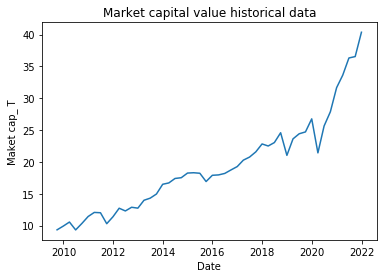

In [25]:
import seaborn as sns
# plot the data
ax= sns.lineplot(x = "Date", y = "Maket cap_ T", data = df4)
ax.set_title("Market capital value historical data")